<a href="https://colab.research.google.com/github/handhak0/dacon_JobTrend_visualization/blob/main/trend_keyword.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 모듈 불러오기

In [1]:
%%bash
apt-get update
apt-get install g++ openjdk-8-jdk python-dev python3-dev
pip3 install JPype1
pip3 install konlpy

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [696 B]
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:12 https://cloud.r-project.org/bin/linux/ubuntu bi

In [2]:
%env JAVA_HOME "/usr/lib/jvm/java-8-openjdk-amd64"

env: JAVA_HOME="/usr/lib/jvm/java-8-openjdk-amd64"


In [3]:
%%bash
bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)
pip3 install /tmp/mecab-python-0.996

Installing automake (A dependency for mecab-ko)
Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:2 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:3 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:4 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:9 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:13 http://ppa.l

debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 5.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 1381k  100 1381k    0     0  2747k      0 --:--:-- --:--:-- --:--:-- 2747k
./configure: line 7378: /usr/bin/file: No such file or directory
In file included from viterbi.cpp:14:0:
param.h:30:13: warning: 'Target {anonymous}::lexical_cast(Source) [with Target = std::__cxx11::basic_string<char>; Source = std::_

In [4]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 62 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (8,059 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 156090 files and d

In [5]:
cd /tmp/mecab-ko-dic-2.1.1-20180720/

/tmp/mecab-ko-dic-2.1.1-20180720


In [6]:
!ls

aclocal.m4	EF.csv	     Makefile	     NR.csv		user-dic
AUTHORS		EP.csv	     Makefile.am     Person-actor.csv	VA.csv
autogen.sh	ETM.csv      Makefile.in     Person.csv		VCN.csv
autom4te.cache	ETN.csv      matrix.bin      Place-address.csv	VCP.csv
ChangeLog	feature.def  matrix.def      Place.csv		VV.csv
char.bin	Foreign.csv  missing	     Place-station.csv	VX.csv
char.def	Group.csv    MM.csv	     pos-id.def		Wikipedia.csv
clean		Hanja.csv    model.bin	     Preanalysis.csv	XPN.csv
CoinedWord.csv	IC.csv	     model.def	     README		XR.csv
config.log	Inflect.csv  NEWS	     rewrite.def	XSA.csv
config.status	INSTALL      NNBC.csv	     right-id.def	XSN.csv
configure	install-sh   NNB.csv	     Symbol.csv		XSV.csv
configure.ac	J.csv	     NNG.csv	     sys.dic
COPYING		left-id.def  NNP.csv	     tools
dicrc		MAG.csv      NorthKorea.csv  unk.def
EC.csv		MAJ.csv      NP.csv	     unk.dic


In [7]:
cd user-dic/

/tmp/mecab-ko-dic-2.1.1-20180720/user-dic


In [8]:
!ls

nnp.csv  person.csv  place.csv	README.md


In [9]:
f = open('nnp.csv', 'a')

f.write('당근마켓,,,-1500,NNP,*,T,당근마켓,*,*,*,*,* \n')
f.write('마켓컬리,,,-1500,NNP,*,F,마켓컬리,*,*,*,*,* \n')
f.write('11번가,,,-1500,NNP,*,F,11번가,*,*,*,*,* \n')
f.write('크래프톤,,,-1500,NNP,*,T,크래프톤,*,*,*,*,* \n')
f.write('메쉬코리아,,,-1500,NNP,*,F,메쉬코리아,*,*,*,*,* \n')
f.write('삼성청년SW아카데미,,,-1500,NNP,*,F,삼성청년SW아카데미,*,*,*,*,* \n')
f.write('메타버스,,,-1500,NNP,*,F,메타버스,*,*,*,*,* \n')
f.write('언택트,,,-1500,NNP,*,F,언택트,*,*,*,*,* \n')
f.write('비대면,,,-1500,NNP,*,T,비대면,*,*,*,*,* \n')
f.write('워크넷,,,-1500,NNP,*,T,워크넷,*,*,*,*,* \n')
f.write('G마켓,,,-1500,NNP,*,T,G마켓,*,*,*,*,* \n')
f.write('쏘카,,,-1500,NNP,*,F,쏘카,*,*,*,*,* \n')
f.write('타다,,,-1500,NNP,*,F,타다,*,*,*,*,* \n')
f.write('카카오페이,,,-1500,NNP,*,F,카카오페이,*,*,*,*,* \n')
f.write('뱅크샐러드,,,-1500,NNP,*,F,뱅크샐러드,*,*,*,*,* \n')
f.write('요기요,,,-1500,NNP,*,F,요기요,*,*,*,*,* \n')
f.write('플랫폼,,,-1500,NNP,*,T,플랫폼,*,*,*,*,* \n')
f.write('카카오뱅크,,,-1500,NNP,*,F,카카오뱅크,*,*,*,*,*')
f.close()


In [10]:
cd ..

/tmp/mecab-ko-dic-2.1.1-20180720


In [11]:
! tools/add-userdic.sh

generating userdic...
nnp.csv
/tmp/mecab-ko-dic-2.1.1-20180720/tools/../model.def is not a binary model. reopen it as text mode...
reading /tmp/mecab-ko-dic-2.1.1-20180720/tools/../user-dic/nnp.csv ... 
done!
person.csv
/tmp/mecab-ko-dic-2.1.1-20180720/tools/../model.def is not a binary model. reopen it as text mode...
reading /tmp/mecab-ko-dic-2.1.1-20180720/tools/../user-dic/person.csv ... 
done!
place.csv
/tmp/mecab-ko-dic-2.1.1-20180720/tools/../model.def is not a binary model. reopen it as text mode...
reading /tmp/mecab-ko-dic-2.1.1-20180720/tools/../user-dic/place.csv ... 
done!
test -z "model.bin matrix.bin char.bin sys.dic unk.dic" || rm -f model.bin matrix.bin char.bin sys.dic unk.dic
/usr/local/libexec/mecab/mecab-dict-index -d . -o . -f UTF-8 -t UTF-8
reading ./unk.def ... 13
emitting double-array: 100% |###########################################| 
reading ./user-nnp.csv ... 20
reading ./NNB.csv ... 140
reading ./NorthKorea.csv ... 3
reading ./VX.csv ... 125
reading ./VCN.

In [12]:
! sudo make install

make[1]: Entering directory '/tmp/mecab-ko-dic-2.1.1-20180720'
make[1]: Nothing to be done for 'install-exec-am'.
 /bin/mkdir -p '/usr/local/lib/mecab/dic/mecab-ko-dic'
 /usr/bin/install -c -m 644 model.bin matrix.bin char.bin sys.dic unk.dic left-id.def right-id.def rewrite.def pos-id.def dicrc '/usr/local/lib/mecab/dic/mecab-ko-dic'
make[1]: Leaving directory '/tmp/mecab-ko-dic-2.1.1-20180720'


In [13]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

In [14]:
import konlpy
from konlpy.tag import Kkma, Komoran, Hannanum, Okt
from konlpy.utils import pprint
from konlpy.tag import Mecab

In [15]:
import pandas as pd
import numpy as np

import re

import warnings

warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt



from collections import Counter
from wordcloud import WordCloud

## 데이터 불러오기

In [16]:
import os 
os.chdir('/content/drive/MyDrive/프로젝트/데이콘')

In [17]:
os.getcwd()

'/content/drive/MyDrive/프로젝트/데이콘'

In [18]:
df_2020 = pd.read_csv('./data/news_2020.csv')
df_2021 = pd.read_csv('./data/news_2021.csv')

df_2020.drop('Unnamed: 0', axis = 1 , inplace = True)
df_2021.drop('Unnamed: 0', axis = 1 , inplace = True)

In [19]:
# 중복데이터 

df_2020 = df_2020.drop_duplicates(keep = 'first')
df_2021 = df_2021.drop_duplicates(keep = 'first')


df_2020.reset_index(inplace = True, drop = True)
df_2021.reset_index(inplace = True, drop = True)

In [20]:
# 날짜 데이터 추출

def date_extraction(p) : 
  m = re.search('\d{4}.\d{2}', p)
  if m == None : 
      return '2021.12'
  else : 
   return m.group()

In [21]:
df_2020['date'] = df_2020.date.apply(lambda x : date_extraction(x))
df_2020

,title,date
0,"삼성이 키운 SW인재, 기업들 앞다퉈 채용",2020.12
1,"11번가, 예비 신입 개발자들과 '랜선 치킨미팅'",2020.12
2,'막말 논란' 열번 넘게 사과한 변창흠…아빠찬스·지인채용은 적극 반박,2020.12
3,"쏘카-타다, 경력 개발자 공개 채용",2020.12
4,IT개발자 꿈…문과생도 문제없죠,2020.12
...,...,...
2514,"언론사 떠난 디지털 인재들… ""기자만 의사결정? 그러면 혁신 못해요""",2020.09
2515,"유통업계, 2030 취향 저격하는 '라이브 방송'이 대세",2020.09
2516,"현대오토에버-이노베이션아카데미, 디지털 인재 육성 통한 소프트웨어 산업 발...",2020.09
2517,"당신이 놓친, 숨겨진 소프트웨어 개발 비용 5가지",2020.09


In [22]:
df_2021['date'] = df_2021.date.apply(lambda x : date_extraction(x))
df_2021

,title,date
0,"이마트 품에 안긴 이베이, 개발자 신규 채용 2배로 확대",2021.12
1,"크래프톤 美 스튜디오 SDS, 개발 인력 채용",2021.12
2,"카카오뱅크, 채용전환형 개발자 인턴 모집…""내년 4월 정식 채용""",2021.12
3,"롯데 'IT개발자' 모시기 대규모 채용…신세계, 이베이 M&A효과 조직개편 '박차...",2021.12
4,시중은행 ‘만 41세’도 희망퇴직자...인터넷은행은 대규모 ‘개발자’ 채용,2021.12
...,...,...
2195,"스마일게이트 스토브, 채용연계형 인턴십 '스토브 개발캠프' 2기 모집",2021.09
2196,"[취업정보] '삼성청년SW아카데미' 누적 2,000명 취업..교육부터 취업까지 종합...",2021.12
2197,"메쉬코리아 부릉, 31일까지 IT 인재 공개 채용",2021.10
2198,‘삼성청년SW아카데미’ 5기 수료식 성료…3년새 대기업 2000명 취업,2021.12


In [23]:
df_2020['year'] = df_2020['date'].str[:4].astype(int)
df_2020['month'] = df_2020['date'].str[5:7].astype(int)
df_2020

,title,date,year,month
0,"삼성이 키운 SW인재, 기업들 앞다퉈 채용",2020.12,2020,12
1,"11번가, 예비 신입 개발자들과 '랜선 치킨미팅'",2020.12,2020,12
2,'막말 논란' 열번 넘게 사과한 변창흠…아빠찬스·지인채용은 적극 반박,2020.12,2020,12
3,"쏘카-타다, 경력 개발자 공개 채용",2020.12,2020,12
4,IT개발자 꿈…문과생도 문제없죠,2020.12,2020,12
...,...,...,...,...
2514,"언론사 떠난 디지털 인재들… ""기자만 의사결정? 그러면 혁신 못해요""",2020.09,2020,9
2515,"유통업계, 2030 취향 저격하는 '라이브 방송'이 대세",2020.09,2020,9
2516,"현대오토에버-이노베이션아카데미, 디지털 인재 육성 통한 소프트웨어 산업 발...",2020.09,2020,9
2517,"당신이 놓친, 숨겨진 소프트웨어 개발 비용 5가지",2020.09,2020,9


In [24]:
df_2021['year'] = df_2021['date'].str[:4].astype(int)
df_2021['month'] = df_2021['date'].str[5:7].astype(int)
df_2021

,title,date,year,month
0,"이마트 품에 안긴 이베이, 개발자 신규 채용 2배로 확대",2021.12,2021,12
1,"크래프톤 美 스튜디오 SDS, 개발 인력 채용",2021.12,2021,12
2,"카카오뱅크, 채용전환형 개발자 인턴 모집…""내년 4월 정식 채용""",2021.12,2021,12
3,"롯데 'IT개발자' 모시기 대규모 채용…신세계, 이베이 M&A효과 조직개편 '박차...",2021.12,2021,12
4,시중은행 ‘만 41세’도 희망퇴직자...인터넷은행은 대규모 ‘개발자’ 채용,2021.12,2021,12
...,...,...,...,...
2195,"스마일게이트 스토브, 채용연계형 인턴십 '스토브 개발캠프' 2기 모집",2021.09,2021,9
2196,"[취업정보] '삼성청년SW아카데미' 누적 2,000명 취업..교육부터 취업까지 종합...",2021.12,2021,12
2197,"메쉬코리아 부릉, 31일까지 IT 인재 공개 채용",2021.10,2021,10
2198,‘삼성청년SW아카데미’ 5기 수료식 성료…3년새 대기업 2000명 취업,2021.12,2021,12


In [25]:
df_2020

,title,date,year,month
0,"삼성이 키운 SW인재, 기업들 앞다퉈 채용",2020.12,2020,12
1,"11번가, 예비 신입 개발자들과 '랜선 치킨미팅'",2020.12,2020,12
2,'막말 논란' 열번 넘게 사과한 변창흠…아빠찬스·지인채용은 적극 반박,2020.12,2020,12
3,"쏘카-타다, 경력 개발자 공개 채용",2020.12,2020,12
4,IT개발자 꿈…문과생도 문제없죠,2020.12,2020,12
...,...,...,...,...
2514,"언론사 떠난 디지털 인재들… ""기자만 의사결정? 그러면 혁신 못해요""",2020.09,2020,9
2515,"유통업계, 2030 취향 저격하는 '라이브 방송'이 대세",2020.09,2020,9
2516,"현대오토에버-이노베이션아카데미, 디지털 인재 육성 통한 소프트웨어 산업 발...",2020.09,2020,9
2517,"당신이 놓친, 숨겨진 소프트웨어 개발 비용 5가지",2020.09,2020,9


## 자연어 처리

### 토큰화
- mecab 사용 [참고](https://sanghyu.tistory.com/170)

In [26]:
# import konlpy
# from konlpy.tag import Kkma, Komoran, Hannanum, Okt
# from konlpy.utils import pprint
# from konlpy.tag import Mecab
mecab = Mecab()

In [27]:
df_2020['title'] = df_2020['title'].str.replace('…', ' ')
for i in range(df_2020.shape[0]) : 
 df_2020['title'][i] = df_2020['title'][i].replace('...', ' ')
 df_2020['title'][i] = df_2020['title'][i].replace('+]', ' ')
 df_2020['title'][i] = df_2020['title'][i].replace('워크넷 채용정보', ' ')
 df_2020['title'][i] = df_2020['title'][i].replace('민간기업 일자리 정보', ' ')


In [28]:
import re 
def apply_mecab(text) : 
  english = re.compile('[a-zA-Z]+') # 한글과 띄어쓰기를 제외한 모든 글자
  result = english.findall(text)
  li_nouns = mecab.nouns(text)
  li_nouns = [n for n in li_nouns if len(n) > 1]
  li_nouns += result
  return li_nouns

In [29]:
def apply_split(text) : 
  nouns = text.split()
  nouns = [n for n in nouns if len(n) > 1]
  return nouns 

In [30]:
df_2020['mecab'] = df_2020['title'].apply(lambda x : apply_mecab(x))
df_2020['split'] = df_2020['title'].apply(lambda x : apply_split(x))


## 2021

In [31]:
df_2021['title'] = df_2021['title'].str.replace('…', ' ')
for i in range(df_2021.shape[0]) : 
 df_2021['title'][i] = df_2021['title'][i].replace('...', ' ')
 df_2021['title'][i] = df_2021['title'][i].replace('+]', ' ')
 df_2021['title'][i] = df_2021['title'][i].replace('워크넷 채용정보', ' ')
 df_2021['title'][i] = df_2021['title'][i].replace('민간기업 일자리 정보', ' ')

In [32]:
df_2021['mecab'] = df_2021['title'].apply(lambda x : apply_mecab(x))
df_2021['split'] = df_2021['title'].apply(lambda x : apply_split(x))

df_2021

,title,date,year,month,mecab,split
0,"이마트 품에 안긴 이베이, 개발자 신규 채용 2배로 확대",2021.12,2021,12,"[이마트, 이베이, 개발자, 신규, 채용, 확대]","[이마트, 품에, 안긴, 이베이,, 개발자, 신규, 채용, 2배로, 확대]"
1,"크래프톤 美 스튜디오 SDS, 개발 인력 채용",2021.12,2021,12,"[크래프톤, 스튜디오, 개발, 인력, 채용, SDS]","[크래프톤, 스튜디오, SDS,, 개발, 인력, 채용]"
2,"카카오뱅크, 채용전환형 개발자 인턴 모집 ""내년 4월 정식 채용""",2021.12,2021,12,"[카카오뱅크, 채용, 전환, 개발자, 인턴, 모집, 내년, 정식, 채용]","[카카오뱅크,, 채용전환형, 개발자, 인턴, 모집, ""내년, 4월, 정식, 채용""]"
3,"롯데 'IT개발자' 모시기 대규모 채용 신세계, 이베이 M&A효과 조직개편 '박차",2021.12,2021,12,"[롯데, 개발자, 규모, 채용, 신세계, 이베이, 효과, 조직, 개편, IT, M, A]","[롯데, 'IT개발자', 모시기, 대규모, 채용, 신세계,, 이베이, M&A효과, ..."
4,시중은행 ‘만 41세’도 희망퇴직자 인터넷은행은 대규모 ‘개발자’ 채용,2021.12,2021,12,"[시중, 은행, 희망, 퇴직자, 인터넷, 은행, 규모, 개발자, 채용]","[시중은행, ‘만, 41세’도, 희망퇴직자, 인터넷은행은, 대규모, ‘개발자’, 채용]"
...,...,...,...,...,...,...
2195,"스마일게이트 스토브, 채용연계형 인턴십 '스토브 개발캠프' 2기 모집",2021.09,2021,9,"[스마일게이트, 스토브, 채용, 연계, 인턴, 스토브, 개발, 캠프, 모집]","[스마일게이트, 스토브,, 채용연계형, 인턴십, '스토브, 개발캠프', 2기, 모집]"
2196,"[취업정보] '삼성청년SW아카데미' 누적 2,000명 취업..교육부터 취업까지 종합",2021.12,2021,12,"[취업, 정보, 삼성청년SW아카데미, 누적, 취업, 교육, 취업, 종합, SW]","[[취업정보], '삼성청년SW아카데미', 누적, 2,000명, 취업..교육부터, 취..."
2197,"메쉬코리아 부릉, 31일까지 IT 인재 공개 채용",2021.10,2021,10,"[메쉬코리아, 인재, 공개, 채용, IT]","[메쉬코리아, 부릉,, 31일까지, IT, 인재, 공개, 채용]"
2198,‘삼성청년SW아카데미’ 5기 수료식 성료 3년새 대기업 2000명 취업,2021.12,2021,12,"[삼성청년SW아카데미, 수료식, 기업, 취업, SW]","[‘삼성청년SW아카데미’, 5기, 수료식, 성료, 3년새, 대기업, 2000명, 취업]"


In [ ]:
total = []
for i in df_2020['mecab'] : 
  if '요기' in i : 
    idx = i.index('요기')
    i[idx] = '요기요'
  total += i 
count2020 = Counter(total)

tags_2020 = count2020.most_common(52)
tags_2020 = tags_2020[2:]
tags_2020

In [ ]:
total = []
for i in df_2021['mecab'] : 
  if '요기' in i : 
    idx = i.index('요기')
    i[idx] = '요기요'
  total += i 
count2021 = Counter(total)

tags_2021 = count2021.most_common(52)
tags_2021 = tags_2021[2:]
tags_2021

In [39]:
li_tags = [tags_2020, tags_2021]

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


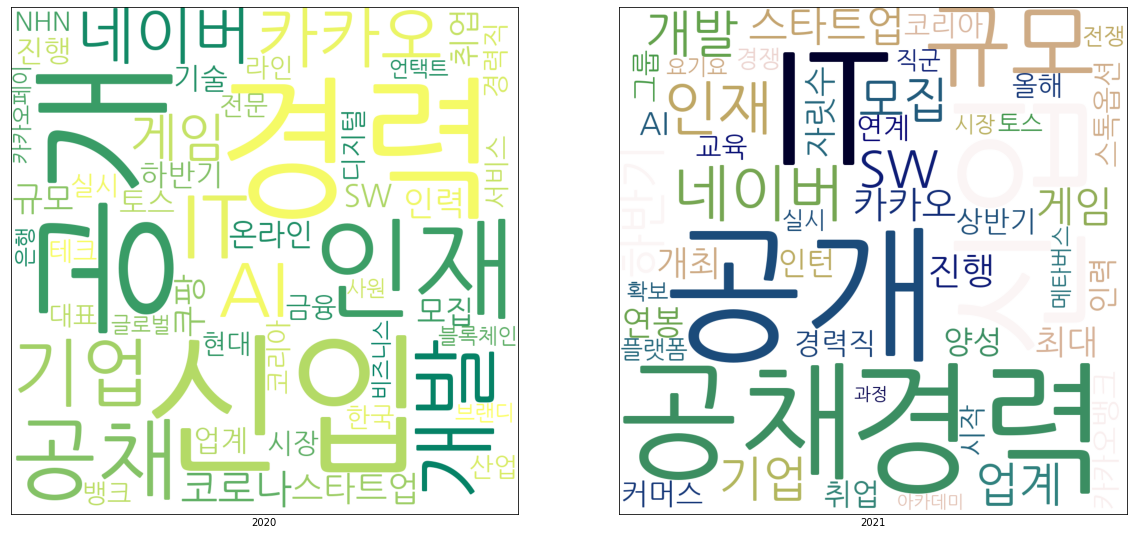

In [40]:
# 그래프 

fig = plt.figure(figsize = (20,20))

rows = 1
cols = 2

i = 1


xlabels = ["xlabel", "2020", "2021"]
palettes = ['summer', 'gist_earth']

for tag in li_tags : 
  wc = WordCloud(font_path=font,\
		background_color="white", \
		width=1000, \
		height=1000, \
		max_words=100, \
		max_font_size=300,
    colormap = palettes[i-1])
  wc = wc.generate_from_frequencies(dict(tag))


  ax = fig.add_subplot(rows, cols, i)
  ax.imshow(wc)
  ax.set_xlabel(xlabels[i])
  # ax.axis('off', interpolation='bilinear')
  ax.set_xticks([]), ax.set_yticks([])
  i+=1

# plt.show()
plt.savefig('news.png')

In [42]:
df_20 = pd.DataFrame(li_tags[0], columns = ['word', 'count'])
# tags_2020

df_21 = pd.DataFrame(li_tags[1], columns = ['word', 'count'])
df_21

,word,count
0,IT,280
1,신입,256
2,공개,252
3,경력,238
4,공채,205
5,규모,201
6,네이버,194
7,인재,176
8,SW,137
9,개발,129


In [ ]:
import numpy as np
import plotly.express as px 
import plotly.graph_objects as go

fig = go.Figure()
fig = go.bar( x = df_20['word'], y = df_20['count'])
# fig.update_traces(marker_color='green')
fig.show()

In [92]:
data_2020 =go.Bar(
x = df_20['word'], y = df_20['count'],
    name="2020년",
    # opacity=0.9,
    marker={'color':'rgb(179,205,227)', 'line':{'color':'White','width':1}}
    )

data_2021 =go.Bar(
x = df_21['word'], y = df_21['count'],
    name="2021년",
    # opacity=0.9,
    marker={'color':'rgb(251,180,174)', 'line':{'color':'White','width':1}}
    )
cnt_data = [data_2020, data_2021]
layout = go.Layout(
    title = '<b>개발자 채용 관련 뉴스 키워드 TOP 50</b>',
    xaxis = {'title':'키워드'},
    yaxis = {'title':'Count'},
    )

fig = go.Figure(data=cnt_data, layout=layout)
fig.show()

In [45]:
df_20['year'] = '2020'
df_21['year'] = '2021'

In [ ]:
tags_2020

In [ ]:
tags_2021

## 키워드 성격 분류

In [53]:
t1 = ['IT', 'AI', '게임', 'SW', '온라인', '기술', '금융', '뱅크', '디지털', '테크', '서비스', '블록체인', '언택트', '은행', '글로벌', '비즈니스', '커머스', '플랫폼', '메타버스']
t2 = ['카카오', '카카오페이', '카카오뱅크', '네이버', '스타트업', '쿠팡', '토스', '현대', '라인', 'NHN', '브랜디', '요기요']
t3 = ['경력', '신입', '공개', '인재', '공채', '하반기', '상반기', '모집', '업계','연봉', '자릿수', '인턴', '인력', '취업', '경력직', '스톡옵션', '직군', '경쟁', '전쟁', '확보']
t4 = ['아카데미', '과정', '교육', '양성']


In [55]:
df_20['type'] = None
for i in range(50) : 
  word = df_20['word'][i]
  if word in t1 : 
    df_20['type'][i] = '산업'
  elif word in t2 : 
    df_20['type'][i] = '기업'
  elif word in t3 :
    df_20['type'][i] = '채용'
  elif word in t4 : 
    df_20['type'][i] = '교육'
  else : 
    df_20['type'][i] = '기타'

In [56]:
df_21['type'] = None
for i in range(50) : 
  word = df_21['word'][i]
  if word in t1 : 
    df_21['type'][i] = '산업'
  elif word in t2 : 
    df_21['type'][i] = '기업'
  elif word in t3 :
    df_21['type'][i] = '채용'
  elif word in t4 : 
    df_21['type'][i] = '교육'
  else : 
    df_21['type'][i] = '기타'

In [125]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows = 1, cols = 2,
                    specs = [[{'type' : 'pie'}, 
                              {'type' : 'pie'}]],
                    subplot_titles=("2020년", "2021년"))
# fig = go.Figure()
fig.add_trace (go.Pie(labels = df_20['type'], values = df_20['count']),
               row = 1,  col = 1)
fig.add_trace (go.Pie(labels = df_21['type'], values = df_21['count']),
               row = 1,  col = 2)

fig.update_traces(marker = dict(line=dict(color='white', width=2)))

fig.update_layout(title = '<b>개발자 채용 관련 뉴스 키워드 종류</b>')
fig.show()

In [126]:
df_20.to_csv('df_20.csv')
df_21.to_csv('df_21.csv')